In [594]:
"""
House Price Prediction using SGD Regressor
===========================================
This script uses a Stochastic Gradient Descent (SGD) regressor to predict house prices
based on selected features such as lot size, number of bedrooms, and number of bathrooms.
The dataset is split into training and testing sets, and the model is evaluated using various
error metrics and visualizations.

Dependencies:
- pandas: For data loading and manipulation.
- scikit-learn: For regression, data splitting, and evaluation metrics.
- matplotlib & seaborn: For visualizing predictions and residuals.

Data Source:
The dataset is publicly available and contains house pricing data.

Author: [Your Name]
Date: [Add Date Here]
"""

# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

In [595]:
#Load the data
training_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Trainingsdaten_long.csv')
training_data



,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,Samstag,Sonntag,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt
0,2013-07-01,148.828353,1,0,0,0,0,0,0,0,...,0,0,98.9,0.0,0,0,0,1,0,0
1,2013-07-02,159.793757,1,0,0,0,0,0,0,0,...,0,0,98.9,0.0,0,0,0,1,0,0
2,2013-07-03,111.885594,1,0,0,0,0,0,0,0,...,0,0,98.9,0.0,0,0,0,1,0,0
3,2013-07-04,168.864941,1,0,0,0,0,0,0,0,...,0,0,98.9,0.0,0,0,0,1,0,0
4,2013-07-05,171.280754,1,0,0,0,0,0,0,0,...,0,0,98.9,1.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,2016-12-22,54.322960,0,0,0,0,0,1,0,1,...,0,0,101.2,0.0,0,0,0,0,1,0
7489,2016-12-23,133.499200,0,0,0,0,0,1,0,1,...,0,0,101.2,0.0,0,0,0,1,1,0
7490,2016-12-24,39.577538,0,0,0,0,0,1,0,1,...,1,0,101.2,0.0,0,0,0,1,0,0
7491,2016-12-27,48.890718,0,0,0,0,0,1,0,1,...,0,0,101.2,0.0,0,0,0,1,0,0


In [596]:
# Validierungsdaten laden
validation_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Validierungsdaten_long.csv')
validation_data

,Datum,Umsatz,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,Samstag,Sonntag,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt
0,2017-08-01,166.135486,1,0,0,0,0,0,0,0,...,0,0,102.6,0.0,0,0,0,1,0,0
1,2017-08-02,155.022099,1,0,0,0,0,0,0,0,...,0,0,102.6,0.0,0,0,0,1,0,0
2,2017-08-03,159.575340,1,0,0,0,0,0,0,0,...,0,0,102.6,0.0,0,0,0,1,0,0
3,2017-08-04,161.585239,1,0,0,0,0,0,0,0,...,0,0,102.6,0.0,0,0,0,1,0,0
4,2017-08-05,198.088094,1,0,0,0,0,0,0,0,...,1,0,102.6,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,2017-12-21,87.471228,0,0,0,0,0,1,0,1,...,0,0,102.6,0.0,0,0,0,1,1,0
1837,2017-12-22,71.911652,0,0,0,0,0,1,0,1,...,0,0,102.6,0.0,0,0,0,1,1,0
1838,2017-12-23,84.062223,0,0,0,0,0,1,0,1,...,1,0,102.6,0.0,0,0,0,1,1,0
1839,2017-12-24,60.981969,0,0,0,0,0,1,0,1,...,0,1,102.6,0.0,0,0,0,1,0,0


In [597]:
# Select features and target variable

features = ['Warengruppe_1', 'Warengruppe_2', 'Warengruppe_3', 'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6', 
            'Temp_Very_Cold', 'Temp_Cold', 'Temp_Mild', 'Temp_Warm', 'Temp_Hot', 
            #'Cloud_Clear', 'Cloud_Partly_Cloudy', 'Cloud_Cloudy', 'Wind_Light', 'Wind_Moderate', 'Wind_Strong', 
            'Weather_Good', 'Weather_Light_Issues', 'Weather_Moderate', 'Weather_Severe', 
            'KielerWoche', 
            'Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag', 
            #'VPI', 
            'Number_of_ships', 'Ship', 
            #'Heimspiel', 
            'Feiertag', 
            #'is_holiday', 
            #'Weihnachtsmarkt', 
            'Markt'
            ]
X_train = training_data[features]
y_train = training_data['Umsatz']  # Target variable: Umsatz

X_test = validation_data[features]
y_test = validation_data['Umsatz']

In [598]:
# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=100, learning_rate='invscaling', eta0=0.1)
sgd_model.fit(X_train, y_train)

SGDRegressor(eta0=0.1, max_iter=100)

In [599]:
# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

Predictions for test data: [146.41787687 148.87656955 149.82917017 117.48636367 204.19105347]


In [600]:
# Calculate error metrics
mae = mean_absolute_error(y_test, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, sgd_predictions)  # Mean Squared Error
mape = (abs((y_test - sgd_predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 50.65
Mean Squared Error (MSE): 5133.91
Mean Absolute Percentage Error (MAPE): 32.33%


/tmp/ipykernel_8467/1857845646.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


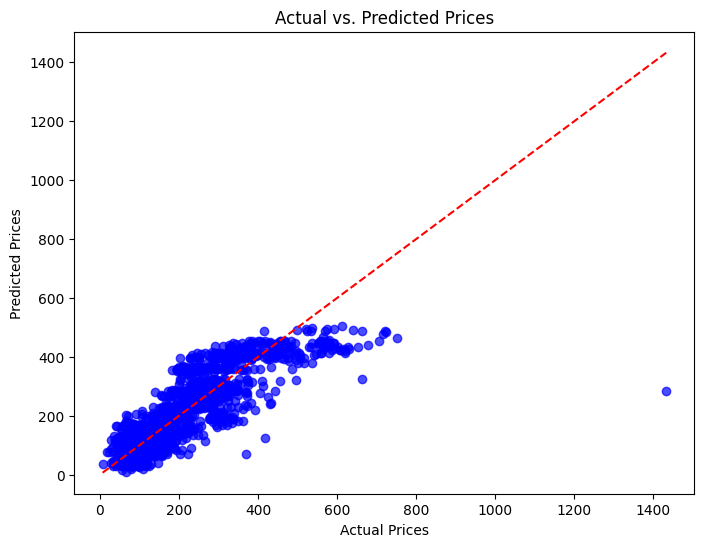

In [601]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [602]:
#Load the test-data

test_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Testdaten.csv')
test_data



,id,Datum,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold,Temp_Cold,...,Samstag,Sonntag,VPI,Number_of_ships,Ship,Heimspiel,Feiertag,is_holiday,Weihnachtsmarkt,Markt
0,1808011,2018-08-01,1,0,0,0,0,0,0,0,...,0,0,104.5,0.0,0,0,0,1,0,0
1,1808021,2018-08-02,1,0,0,0,0,0,0,0,...,0,0,104.5,0.0,0,0,0,1,0,0
2,1808031,2018-08-03,1,0,0,0,0,0,0,0,...,0,0,104.5,0.0,0,0,0,1,0,0
3,1808041,2018-08-04,1,0,0,0,0,0,0,0,...,1,0,104.5,1.0,1,0,0,1,0,0
4,1808051,2018-08-05,1,0,0,0,0,0,0,0,...,0,1,104.5,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,1812226,2018-12-22,0,0,0,0,0,1,0,1,...,1,0,104.2,0.0,0,0,0,1,1,0
1826,1812236,2018-12-23,0,0,0,0,0,1,0,1,...,0,1,104.2,0.0,0,1,0,1,1,0
1827,1812246,2018-12-24,0,0,0,0,0,1,0,1,...,0,0,104.2,0.0,0,0,0,1,0,0
1828,1812276,2018-12-27,0,0,0,0,0,1,0,1,...,0,0,104.2,0.0,0,0,0,1,0,0


In [603]:
test_data_copy = test_data[features]

# Make predictions on the test set

sgd_predictions = sgd_model.predict(test_data_copy)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

Predictions for test data: [129.52561621 124.94831275 133.12703814 175.14585833 204.65395908]


*Jetzt müssen noch die Predictions in die richtigen Reihen der sample_submission.csv gemerged werden*

In [604]:
# Erstellt einen DataFrame aus den Vorhersagen des SGD-Modells
pred = pd.DataFrame(sgd_predictions)
pred


,0
0,129.525616
1,124.948313
2,133.127038
3,175.145858
4,204.653959
...,...
1825,93.151907
1826,93.614812
1827,40.234098
1828,38.458185


In [605]:
# let's merge predictions with the 'id' column:
predictions_df = pd.DataFrame({
    'id': test_data['id'].values,
    'Umsatz': pred[0].values
}).reset_index(drop=True)

predictions_df

,id,Umsatz
0,1808011,129.525616
1,1808021,124.948313
2,1808031,133.127038
3,1808041,175.145858
4,1808051,204.653959
...,...,...
1825,1812226,93.151907
1826,1812236,93.614812
1827,1812246,40.234098
1828,1812276,38.458185


In [606]:

# Speichert den DataFrame als CSV-Datei für die Kaggle-Submission
# index=False verhindert, dass eine zusätzliche Indexspalte geschrieben wird
predictions_df.to_csv('complete_sample_submission.csv', index=False)